In [1]:
# Class:     AI & Machine Learning Bootcamp
# Course:    Applied Data Science Using Python Programming
# Project:   Data Analysis for Australian Clothing Business
# Author:    Eddie Pacheco
# Date:      April 14 2024

## Problem Statement

AAL has been a well-known name in Australia, particularly recognized for its clothing business since 2000. The company serves diverse demographics, including kids, women, men, and seniors, and has established branches across various states in Australia, encompassing metropolises as well as tier-1 and tier-2 cities.

Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the Head of Sales and Marketing (S&M) at AAL.

1)	Identify the states that are generating the highest revenues.
2)	Develop sales programs for states with lower revenues. The Head of Sales and Marketing has requested your assistance with this task.

**Read the csv file. Create and display the dataframe.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vizad.univariate import plot_univariate_numeric,plot_univariate_categorical
from vizad.bivariate import plot_bivariate_numeric,plot_bivariate_categorical
from scipy.stats import boxcox

df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


**Display the shape of the dataframe.**

In [3]:
df.shape

(7560, 6)

**Statistical description of the dataframe.**

In [4]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## 1. Data Wrangling

**1. Ensure that the data is clean and free from any missing or incorrect entries.**

*Extract basic information about the dataframe like data types and memory usage.*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


*Count number of null entries and sum total occurrences.*

In [6]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

*Find any duplicated records and sum their total instances.*

In [7]:
df.duplicated().sum()

0

*From df.info() above we see the largest value for 'Unit' is 65, so we can change the dtype to uint32 and save some memory.*\
*Similarly, the largest value for 'Sales' is 162,500, so we can change the dtype to uint32 and also save some memory.*

In [8]:
df['Unit'] = df['Unit'].astype('uint32')
df['Sales'] = df['Sales'].astype('uint32')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   uint32
 5   Sales   7560 non-null   uint32
dtypes: object(4), uint32(2)
memory usage: 295.4+ KB


**2. Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().**

In [10]:
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [11]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [12]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [13]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

**3. Based on your knowledge of Data Analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).**

*The 'Date' feature data type is currently of type 'object,' so we will set this to be of type 'datetime.'*

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   uint32        
 5   Sales   7560 non-null   uint32        
dtypes: datetime64[ns](1), object(3), uint32(2)
memory usage: 295.4+ KB


In [15]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


*Create list of numerical columns and categorical column names.*

In [16]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()
date_cols = df.select_dtypes(include = np.datetime64).columns.tolist()
cat_cols = [col for col in df.columns if col not in num_cols and col not in date_cols]
num_cols, date_cols, cat_cols

(['Unit', 'Sales'], ['Date'], ['Time', 'State', 'Group'])

*Conduct a simple univariate analysis on the 'Unit' and 'Sales' numeric features to see respective value counts.*

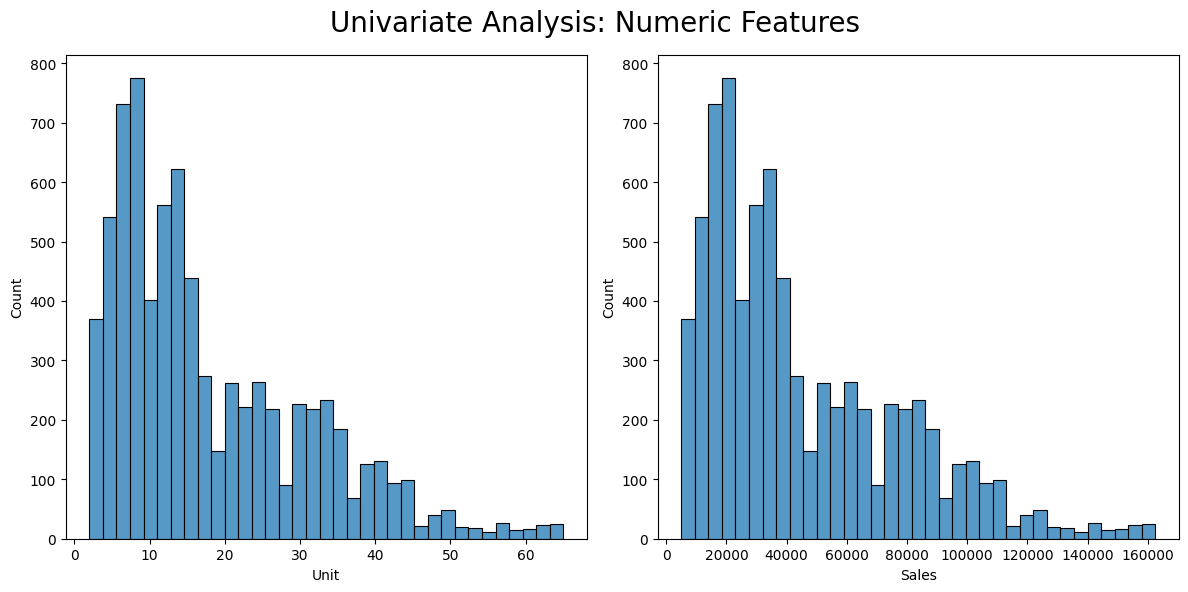

In [17]:
plot_univariate_numeric(df, num_cols, figsize=(12,6), kind = 'hist');

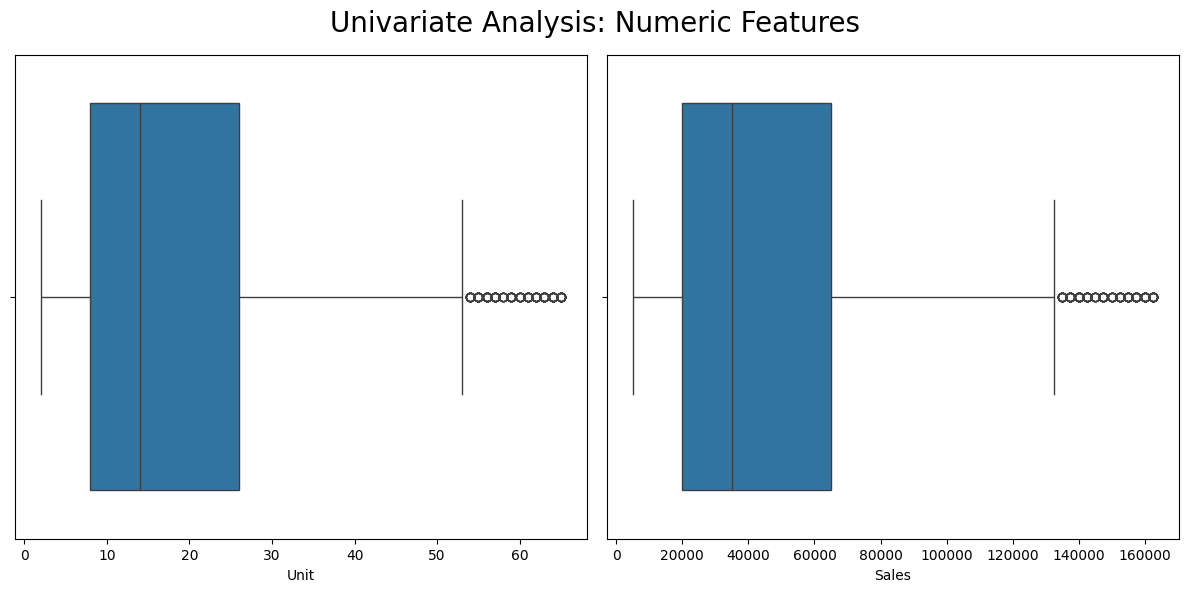

In [18]:
plot_univariate_numeric(df, num_cols, figsize=(12,6), kind = 'box');

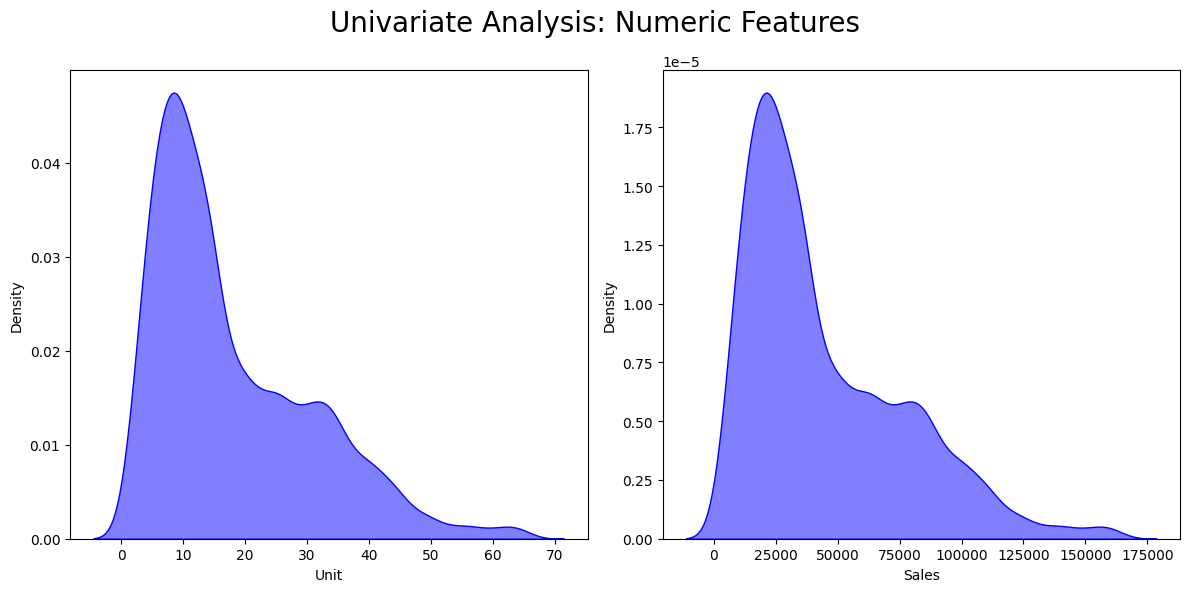

In [19]:
plot_univariate_numeric(df, num_cols, figsize=(12,6), kind = 'density');

*Conduct a simple categorical analysis on the 'Time', 'State' and 'Group' categorical features.*

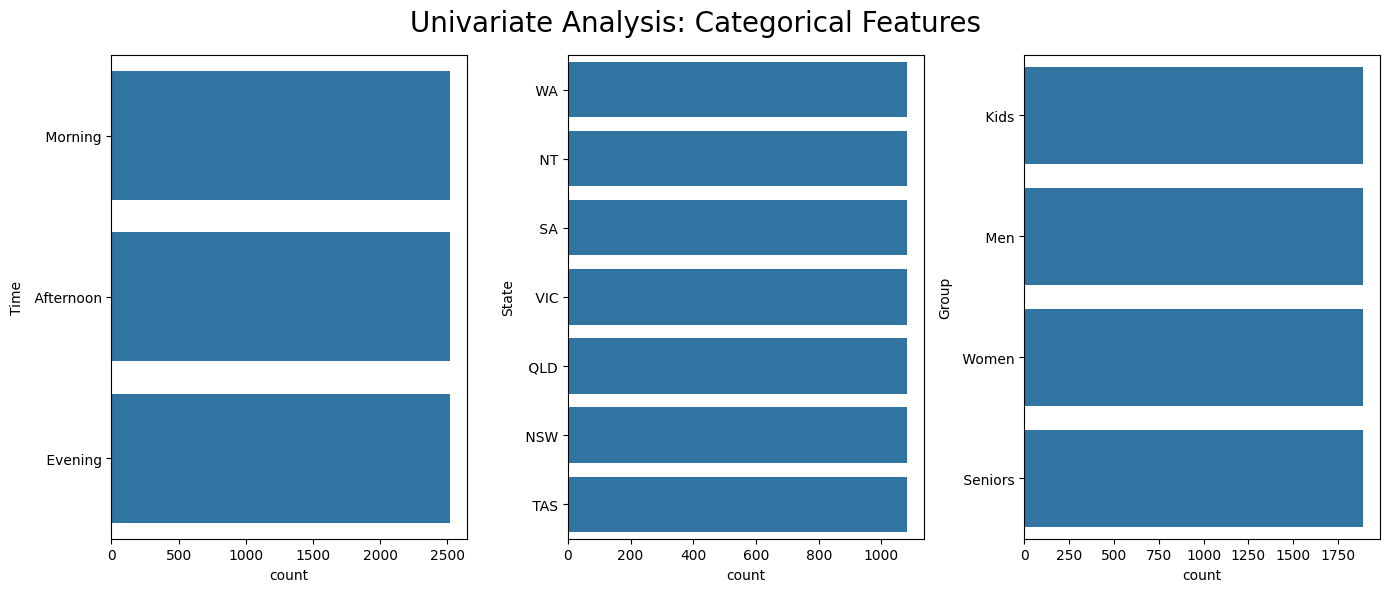

In [20]:
try:
    plot_univariate_categorical(df, cat_cols, figsize = (14,6));
    # kind parameter can only take values 'count' or 'proportion', but 'proportion' will throw an index keyerror here
except KeyError as err:
    print(f"Key error: {err}") 

**4. Choose a suitable Data Wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)**

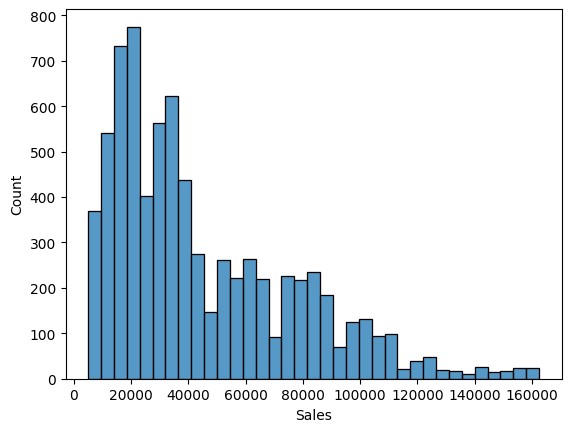

In [21]:
sns.histplot(data=df, x='Sales');

*We will use min-max scaling to normalize our sales data.*

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['sales_normalized'] = scaler.fit_transform(df['Sales'].values.reshape(-1,1))
# we don't normalize the unit data as these are discrete values and are within a reasonable scale
df

,Date,Time,State,Group,Unit,Sales,sales_normalized
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873
...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476
7556,2020-12-30,Evening,TAS,Kids,15,37500,0.206349
7557,2020-12-30,Evening,TAS,Men,15,37500,0.206349
7558,2020-12-30,Evening,TAS,Women,11,27500,0.142857


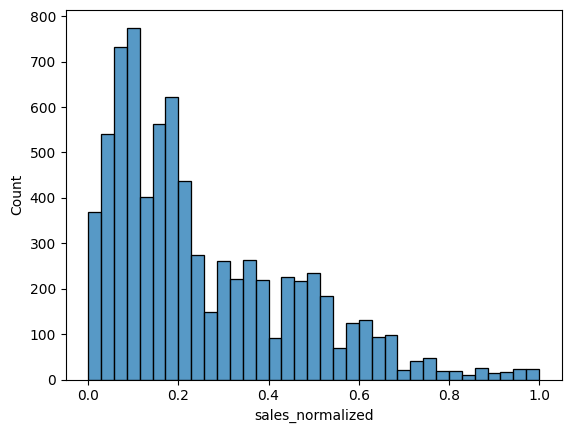

In [23]:
sns.histplot(data=df, x='sales_normalized');

**5. Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.**

*With the GroupBy() method we can aggregate features and determine their correlation.\
Let's consider grouping people by their age groups, states, and time of day purchases to further analyze the data set.\
By chunking the categorical feature data by 'time', 'group', and 'state', we can initiate exploratory analysis to identify patterns, trends, or outliers within subsets of the data.\
The data is granular enough at this point, so merging it may result in some loss of information.*

## 2. Data Analysis

**1. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.**

In [24]:
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode()[0]
sales_std = df['Sales'].std()

print(f"Sales Mean: {sales_mean:.2f}")
print(f"Sales Median: {sales_median:.2f}")
print(f"Sales Mode: {sales_mode:.2f}")
print(f"Sales Standard Deviation: {sales_std:.2f}")

Sales Mean: 45013.56
Sales Median: 35000.00
Sales Mode: 22500.00
Sales Standard Deviation: 32253.51


In [25]:
unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode()[0]
unit_std = df['Unit'].std()

print(f"Unit Mean: {unit_mean:.2f}")
print(f"Unit Median: {unit_median:.2f}")
print(f"Unit Mode: {unit_mode:.2f}")
print(f"Unit Standard Deviation: {unit_std:.2f}")

Unit Mean: 18.01
Unit Median: 14.00
Unit Mode: 9.00
Unit Standard Deviation: 12.90


In [26]:
df.groupby('Group')['Sales'].describe().round(2).T

Group,Kids,Men,Seniors,Women
count,1890.00,1890.00,1890.00,1890.00
mean,45011.90,45370.37,44464.29,45207.67
std,31871.49,32177.18,32195.36,32781.64
min,5000.00,5000.00,5000.00,5000.00
25%,20000.00,20000.00,20000.00,20000.00
50%,35000.00,35000.00,35000.00,35000.00
75%,65000.00,65000.00,62500.00,67500.00
max,162500.00,160000.00,162500.00,162500.00


**2. Identify the group with the highest sales and the group with the lowest sales based on the data provided.**

In [27]:
group_sales = df.groupby('Group')['Sales'].sum().reset_index()

max_sales_group = group_sales.loc[group_sales['Sales'].idxmax()]['Group']
print(f"The group with the highest sales is {max_sales_group}.\n")
print(group_sales.loc[group_sales['Sales'].idxmax()])
print("\n")

min_sales_group = group_sales.loc[group_sales['Sales'].idxmin()]['Group']
print(f"The group with the lowest sales is {min_sales_group}.\n")
print(group_sales.loc[group_sales['Sales'].idxmin()])

The group with the highest sales is  Men.

Group         Men
Sales    85750000
Name: 1, dtype: object


The group with the lowest sales is  Seniors.

Group     Seniors
Sales    84037500
Name: 2, dtype: object


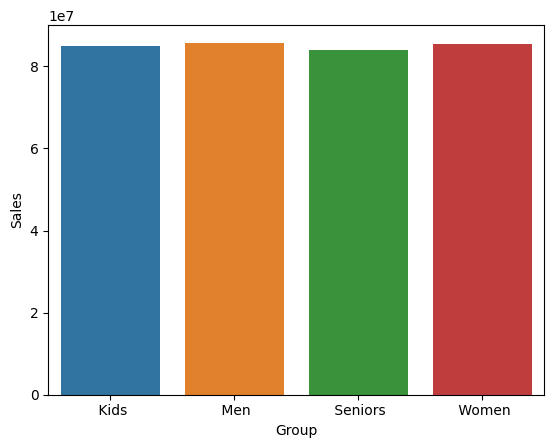

In [28]:
sns.barplot(group_sales, x = 'Group', y = 'Sales', hue = 'Group');

**3. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.\
(Use suitable libraries such as NumPy, Pandas, SciPy, etc. for performing the analysis.)**

*Daily Reports*

In [29]:
daily_report = df.groupby(df['Date'].dt.date).agg({
    'Sales': 'sum',
    'Group': 'count',
    'Unit': 'sum',
}).reset_index()

daily_report.columns = ['Date', 'Daily_Revenue', 'Group_Count', 'Daily_Units_Sold']
daily_report

,Date,Daily_Revenue,Group_Count,Daily_Units_Sold
0,2020-10-01,3720000,84,1488
1,2020-10-02,3715000,84,1486
2,2020-10-03,3890000,84,1556
3,2020-10-04,3720000,84,1488
4,2020-10-05,3862500,84,1545
...,...,...,...,...
85,2020-12-26,4715000,84,1886
86,2020-12-27,4637500,84,1855
87,2020-12-28,4595000,84,1838
88,2020-12-29,4607500,84,1843


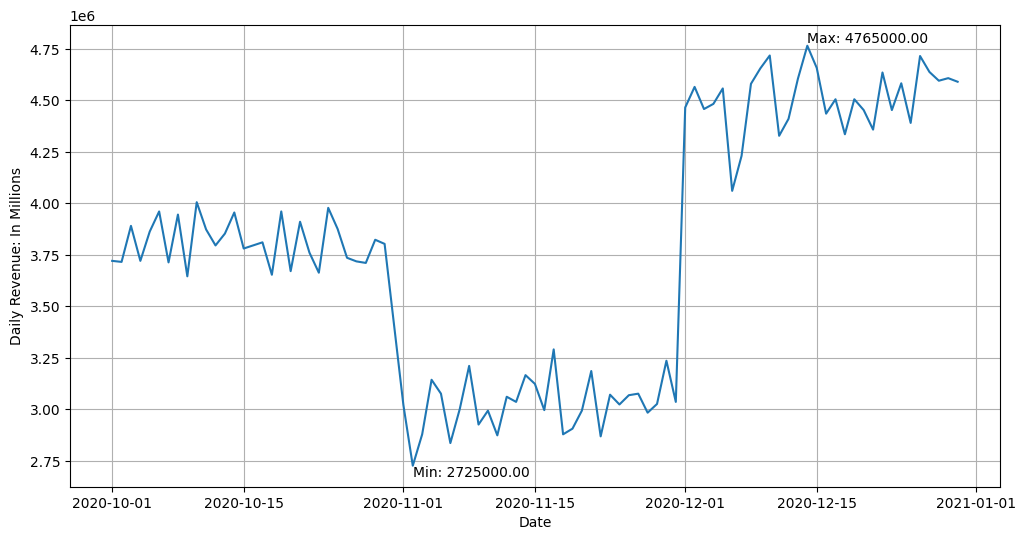

In [30]:
max_revenue = daily_report['Daily_Revenue'].max()
min_revenue = daily_report['Daily_Revenue'].min()

max_revenue_date = daily_report.loc[daily_report['Daily_Revenue'].idxmax()]['Date']
min_revenue_date = daily_report.loc[daily_report['Daily_Revenue'].idxmin()]['Date']

plt.figure(figsize=(12,6))
plt.grid()

ax = sns.lineplot(daily_report, x = 'Date', y = 'Daily_Revenue');
ax.set(ylabel="Daily Revenue: In Millions")

ax.text(daily_report.loc[daily_report['Daily_Revenue'].idxmax(), 'Date'], max_revenue, f"Max: {max_revenue:.2f}", ha='left', va='bottom')
ax.text(daily_report.loc[daily_report['Daily_Revenue'].idxmin(), 'Date'], min_revenue, f"Min: {min_revenue:.2f}", ha='left', va='top')

plt.show()

In [31]:
print(f"The lowest amount of revenue occurs on {min_revenue_date}: {min_revenue}.\n")
print(f"The highest amount of revenue occurs on {max_revenue_date}: {max_revenue}.\n")

The lowest amount of revenue occurs on 2020-11-02: 2725000.

The highest amount of revenue occurs on 2020-12-14: 4765000.



In [32]:
date_sales = df.groupby('Date')['Sales'].sum().reset_index()

highest_sales_date = date_sales.loc[date_sales['Sales'].idxmax(), 'Date']
highest_sales_state = df.loc[df['Date'] == highest_sales_date, 'State'].mode().iloc[0]
print(f"The state with the highest amount of revenue in a day is{highest_sales_state}.\n")

The state with the highest amount of revenue in a day is NSW.



In [33]:
lowest_sales_date = date_sales.loc[date_sales['Sales'].idxmin(), 'Date']

lowest_sales_state = df.loc[df['Date'] == lowest_sales_date, 'State'].mode().iloc[0]
print(f"The state with the lowest amount of revenue in a day is{lowest_sales_state}.\n")

The state with the lowest amount of revenue in a day is NSW.



In [34]:
# Group the data by state and find the min and max sales for each state
state_sales_stats = df.groupby('State')['Sales'].agg(['min', 'max']).reset_index()

# Print the results
print(state_sales_stats)

  State    min     max
0   NSW  30000  112500
1    NT   5000   37500
2   QLD   7500   62500
3    SA  25000   87500
4   TAS   5000   37500
5   VIC  50000  162500
6    WA   5000   37500


*There is a considerable drop in sales during the month of November.\
Sales in December were the highest amount all monthly sales.\
VIC and NSW have the highest min and max sales values, while WA and TAS have the lowest.*

In [35]:
sales_by_day = df.groupby(df['Date'].dt.day_name())['Sales'].sum().reset_index()
sales_by_day.T

,0,1,2,3,4,5,6
Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sales,48000000,48050000,46245000,48330000,49405000,50327500,49945000


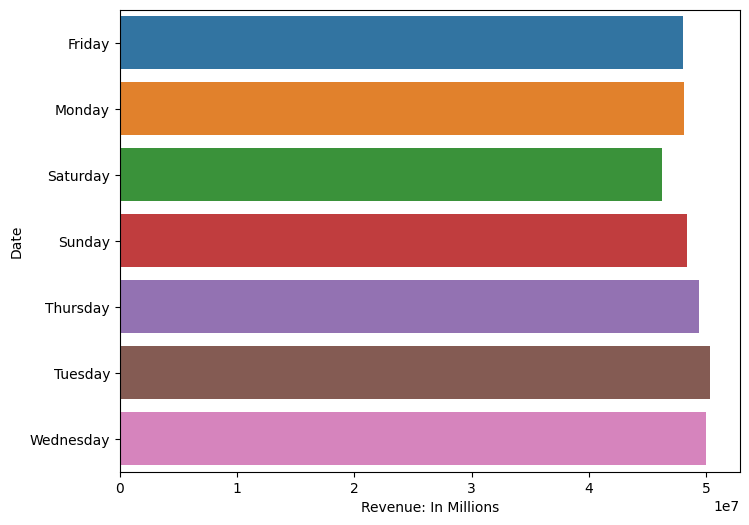

In [36]:
plt.figure(figsize=(8,6))

ax1 = sns.barplot(sales_by_day, x = 'Sales', y = 'Date', hue = 'Date', orient = 'h');
ax1.set(xlabel = "Revenue: In Millions");

*The day with the highest revenue across the data set is 'Tuesday.'\
The day with the lowest revenue across the data set is 'Saturday.'*

In [37]:
sales_mean_by_day = df.groupby(df['Date'].dt.day_name())['Sales'].mean().reset_index()
sales_mean_by_day.T

,0,1,2,3,4,5,6
Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sales,43956.043956,44001.831502,45877.97619,44258.241758,45242.673993,46087.454212,45737.179487


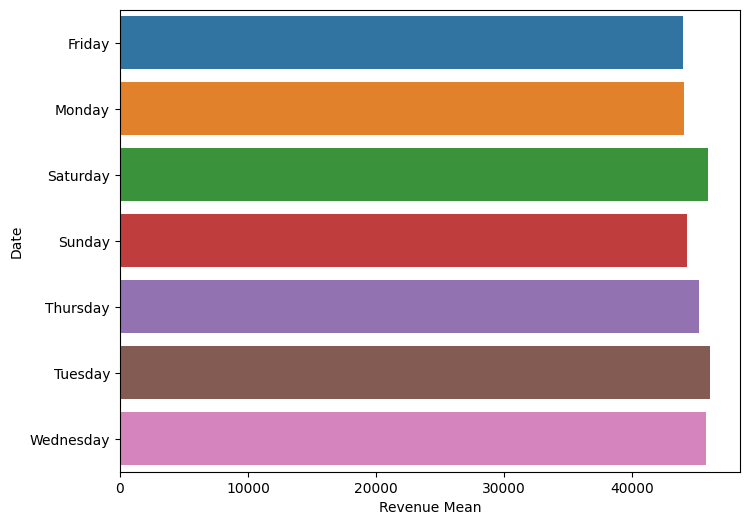

In [38]:
plt.figure(figsize=(8,6))

ax1 = sns.barplot(sales_mean_by_day, x = 'Sales', y = 'Date', hue = 'Date', orient = 'h');
ax1.set(xlabel = "Revenue Mean");

In [39]:
sales_median_by_day = df.groupby(df['Date'].dt.day_name())['Sales'].median().reset_index()
sales_median_by_day.T

,0,1,2,3,4,5,6
Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sales,32500.0,32500.0,35000.0,35000.0,35000.0,35000.0,35000.0


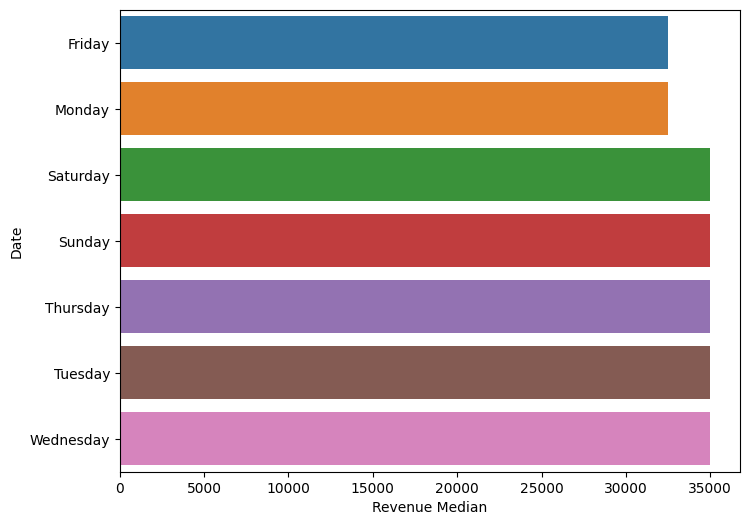

In [40]:
plt.figure(figsize=(8,6))

ax1 = sns.barplot(sales_median_by_day, x = 'Sales', y = 'Date', hue = 'Date', orient = 'h');
ax1.set(xlabel = "Revenue Median");

In [41]:
weekday_sales = sales_by_day.loc[sales_by_day['Date'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]['Sales'].sum()
weekend_sales = sales_by_day.loc[sales_by_day['Date'].isin(['Saturday','Sunday'])]['Sales'].sum()

if weekday_sales > weekend_sales:
    print(f"The highest amount of revenue occurred during the weekdays, with a total of {weekday_sales} sales.\n")
    print(f"The lowest amount of revenue occurred during the weekends, with a total of {weekend_sales} sales.")
elif weekday_sales == weekend_sales:
    print(f"There was an equal amount of revenue during weekdays vs weekends: {weekday_sales}, {weekend_sales}.")
else:
    print(f"The highest amount of revenue occurred during the weekends, with a total of {weekend_sales}.\n")
    print(f"The lowest amount of revenue occurred during the weekdays, with a total of {weekday_sales} sales.")

The highest amount of revenue occurred during the weekdays, with a total of 245727500 sales.

The lowest amount of revenue occurred during the weekends, with a total of 94575000 sales.


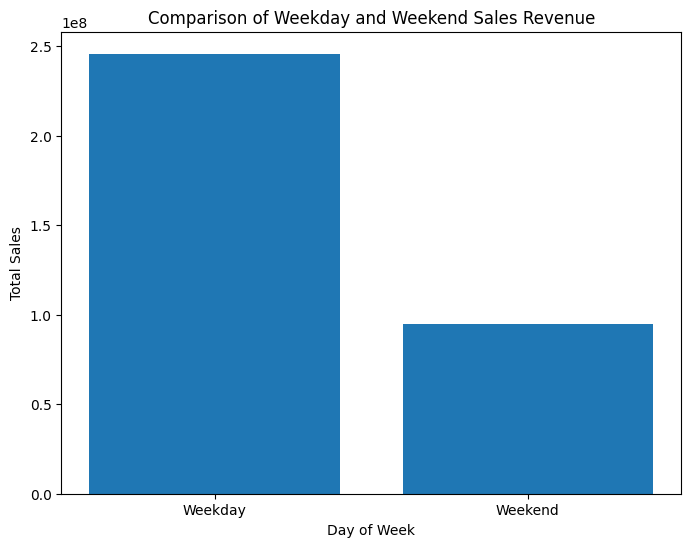

In [42]:
df['Day of Week'] = df['Date'].dt.day_name()
df['Weekday_or_Weekend'] = df['Day of Week'].replace(['Saturday', 'Sunday'], 'Weekend')
df['Weekday_or_Weekend'] = df['Weekday_or_Weekend'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'Weekday')

# Group the data by 'Day of Week' and calculate total sales
sales_by_day = df.groupby('Weekday_or_Weekend')['Sales'].sum().reset_index()

# Calculate weekday and weekend sales
weekday_sales = sales_by_day.loc[sales_by_day['Weekday_or_Weekend'] == 'Weekday']['Sales'].sum()
weekend_sales = sales_by_day.loc[sales_by_day['Weekday_or_Weekend'] == 'Weekend']['Sales'].sum()

# Create the bar plot
plt.figure(figsize=(8, 6))
x = ['Weekday', 'Weekend']
y = [weekday_sales, weekend_sales]
plt.bar(x, y)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Comparison of Weekday and Weekend Sales Revenue')
plt.show()

*Weekly Reports*

In [43]:
weekly_report = df.groupby(df['Date'].dt.isocalendar().week).agg({
    'Sales': 'sum',
    'Group': 'count',
    'Unit': 'sum'
}).reset_index()

weekly_report.columns = ['Week', 'Weekly_Sales', 'Weekly_Group_Count', 'Weekly_Units_Sold']
weekly_report

,Week,Weekly_Sales,Weekly_Group_Count,Weekly_Units_Sold
0,40,15045000,336,6018
1,41,27002500,588,10801
2,42,26640000,588,10656
3,43,26815000,588,10726
4,44,21807500,504,8723
5,45,20865000,588,8346
6,46,21172500,588,8469
7,47,21112500,588,8445
8,48,21477500,588,8591
9,49,29622500,588,11849


*Quarterly Reports*

In [44]:
quarterly_report = df.groupby(df['Date'].dt.quarter).agg({
    'Sales': 'sum',
    'Group': 'count',
    'Unit': 'sum'
}).reset_index()

quarterly_report.columns = ['Quarter', 'Quarterly_Sales', 'Quarterly_Group_Count', 'Quarterly_Units_Sold']
quarterly_report

,Quarter,Quarterly_Sales,Quarterly_Group_Count,Quarterly_Units_Sold
0,4,340302500,7560,136121


*The quarterly report encompasses all of the sales data we have available in the data set.\
A total amount of 340,302,500 sales revenue was reported, with 136121 units sold during this time period.\
The highest amount of sales occurred during the month of December, while the lowest occurred during November.*

## 3. Data Visualization and Report Generation

1. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). The dashboard should encompass key parameters:
2. State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).
3. Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.!
4. Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.
5. Ensure the visualization is clear and accessible for effective decision-making by the Head of S&M.
6. The dashboard must contain daily, weekly, monthly, and quarterly charts.
7. (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
8. Include your recommendation and indicate why you are choosing the recommended visualization package.\
**-- Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.
-- Use Markdown in suitable places while presenting your report.
-- Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
-- Use a box plot for descriptive statistics.
-- Use the Seaborn distribution plot for any other statistical plotting.**

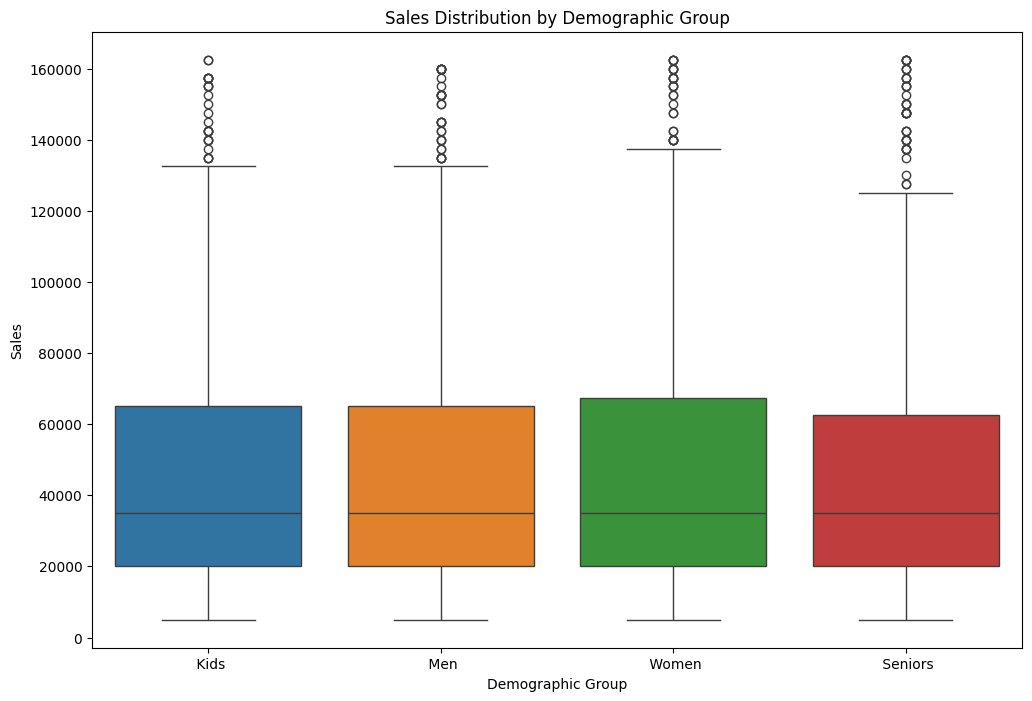

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Sales', data=df, hue='Group')
plt.title('Sales Distribution by Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('Sales')
plt.show()

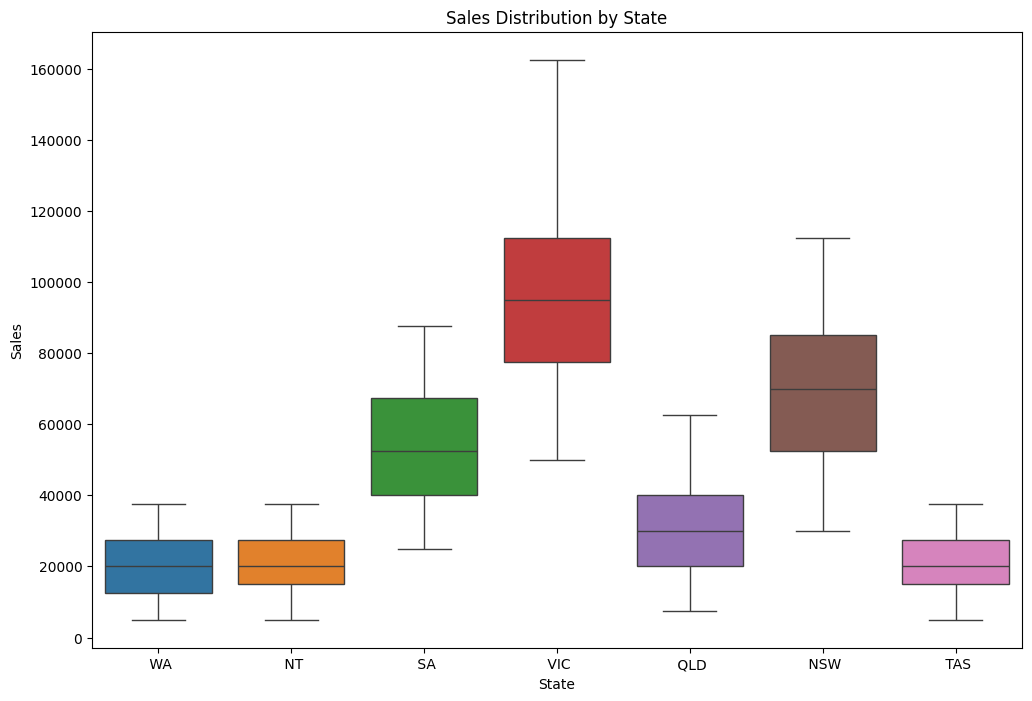

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='State', y='Sales', data=df, hue='State')
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

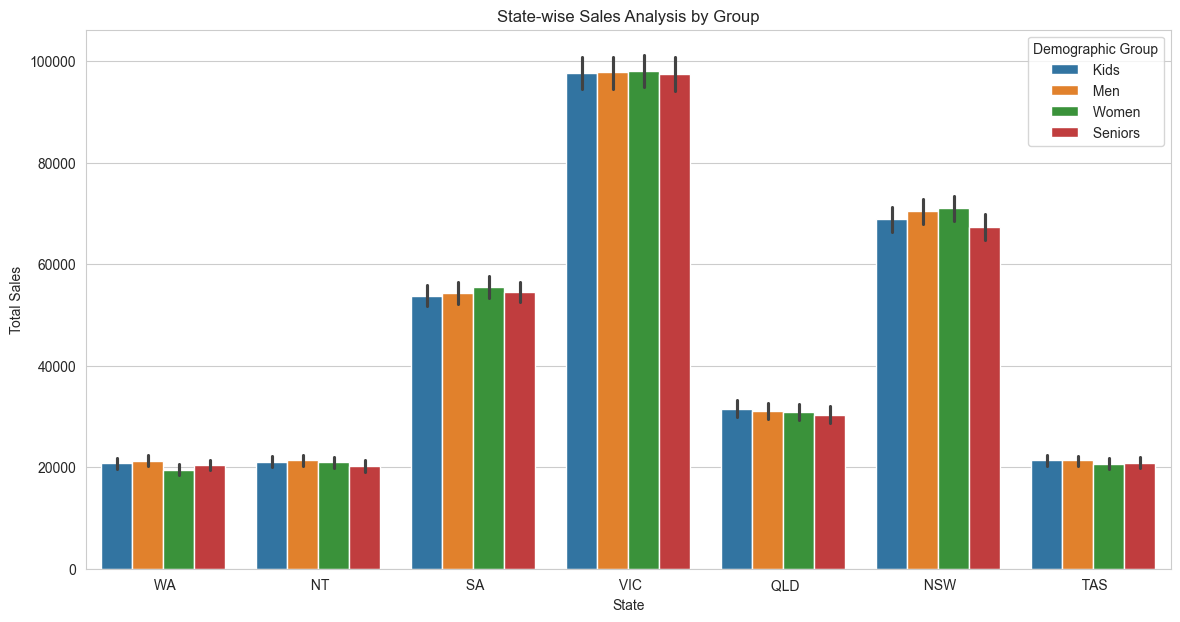

In [47]:
sns.set_style("whitegrid")

# State-wise Sales Analysis for Different Demographic Groups
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis by Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Demographic Group')
plt.show()

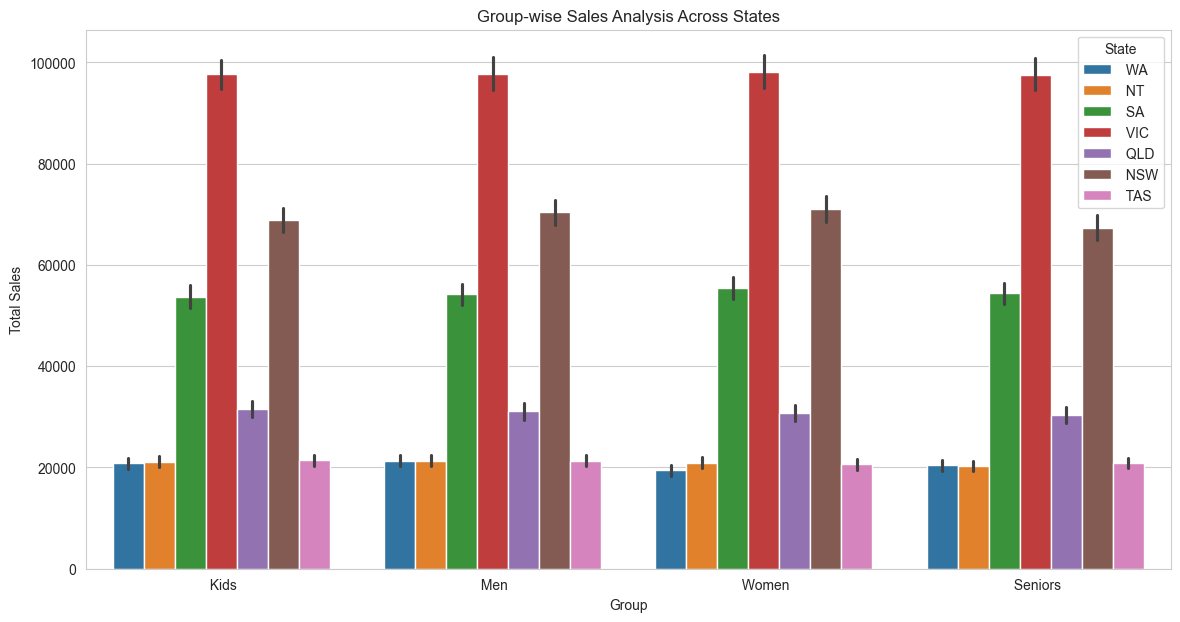

In [48]:
# Group-wise Sales Analysis Across Various States
plt.figure(figsize=(14, 7))
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.title('Group-wise Sales Analysis Across States')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.legend(title='State')
plt.show()

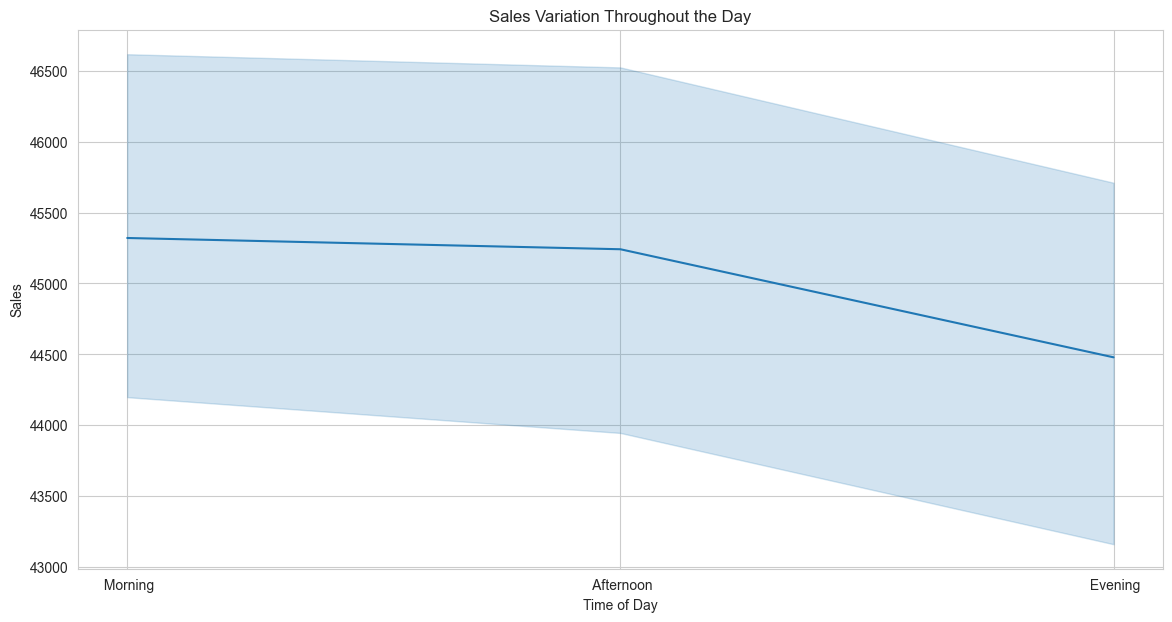

In [49]:
# Time-of-the-Day Analysis
plt.figure(figsize=(14, 7))
sns.lineplot(x='Time', y='Sales', data=df)
plt.title('Sales Variation Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

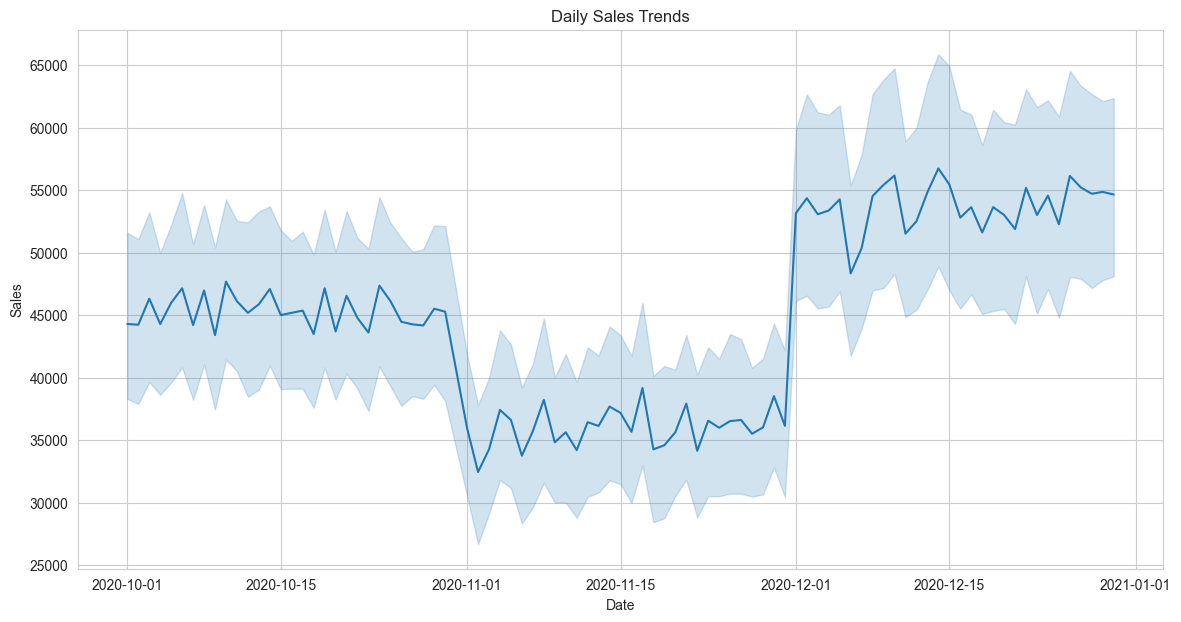

In [50]:
# Temporal Sales Analysis - Daily, Weekly, Monthly, Quarterly
# Daily
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales', data=df)
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

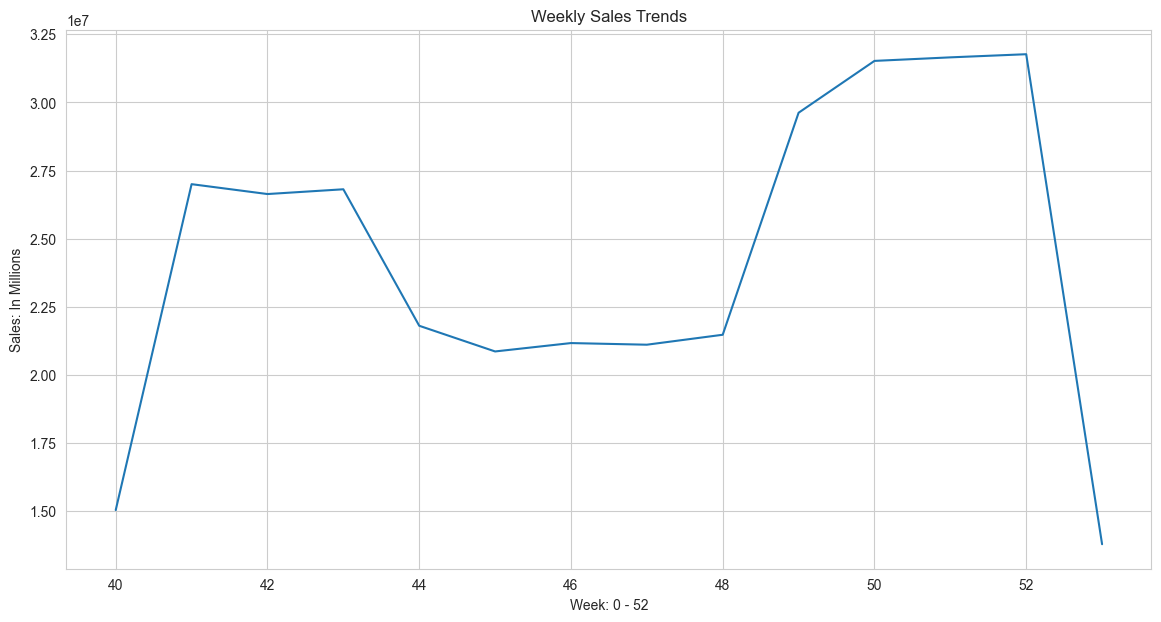

In [51]:
# Weekly
plt.figure(figsize=(14, 7))
sns.lineplot(x='Week', y='Weekly_Sales', data=weekly_report)
plt.title('Weekly Sales Trends')
plt.xlabel('Week: 0 - 52')
plt.ylabel('Sales: In Millions')
plt.show()

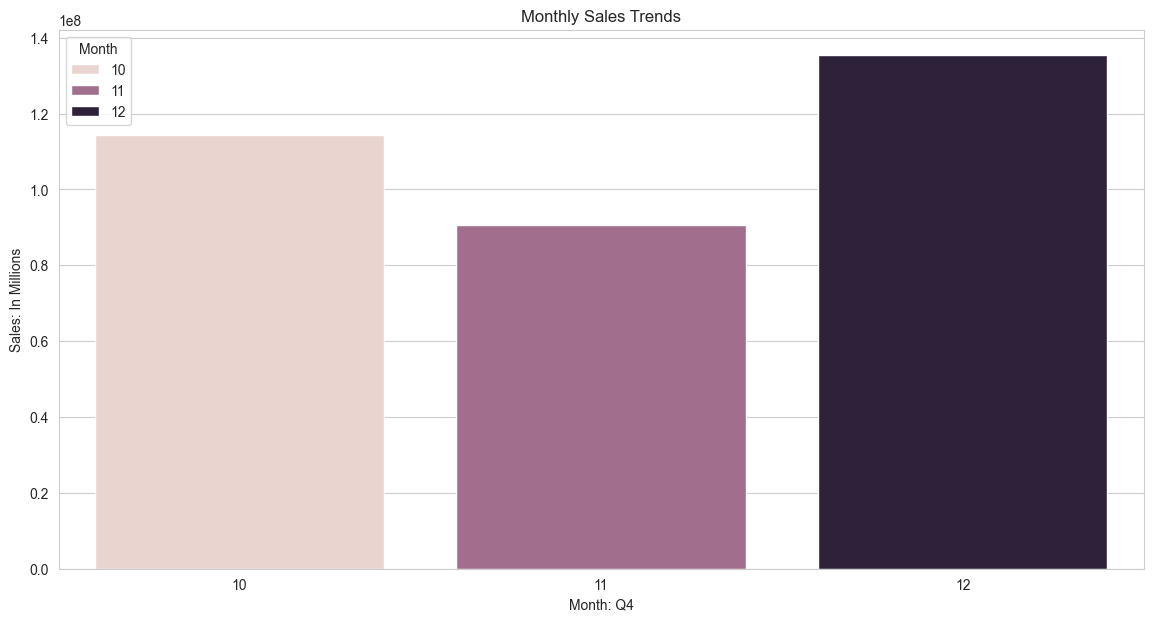

In [52]:
# Monthly
monthly_report = df.groupby(df['Date'].dt.month).agg({
    'Sales': 'sum',
    'Group': 'count',
    'Unit': 'sum'
}).reset_index()

monthly_report.columns = ['Month', 'Monthly_Sales', 'Monthly_Group_Count', 'Monthly_Unit_Total']

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Monthly_Sales', data=monthly_report, hue='Month')
plt.title('Monthly Sales Trends')
plt.xlabel('Month: Q4')
plt.ylabel('Sales: In Millions')
plt.show()

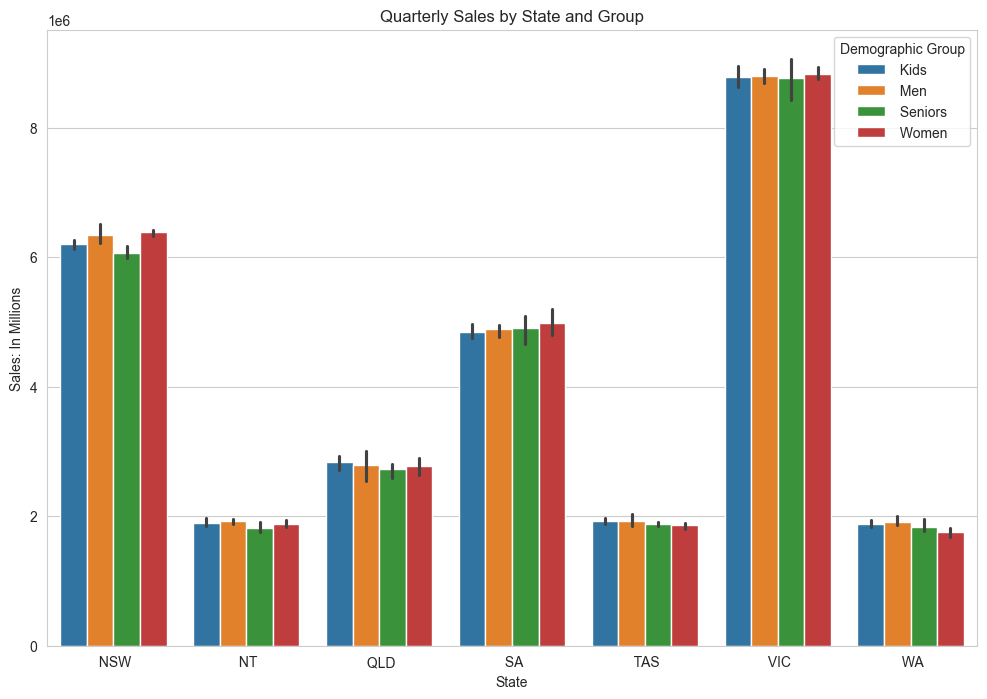

In [53]:
# Filter the data for the 4th quarter

df['Quarter'] = df['Date'].dt.quarter
q4_df = df[df['Quarter'] == 4] # we already know the data set encompasses the 4th quarter

q4_sales = q4_df.groupby(['State', 'Group', 'Quarter', 'Time']).agg(total_sales=('Sales', 'sum')).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='total_sales', hue='Group', data=q4_sales[q4_sales['Quarter'] == 4])
plt.title('Quarterly Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Sales: In Millions')
plt.legend(title='Demographic Group')
plt.show()

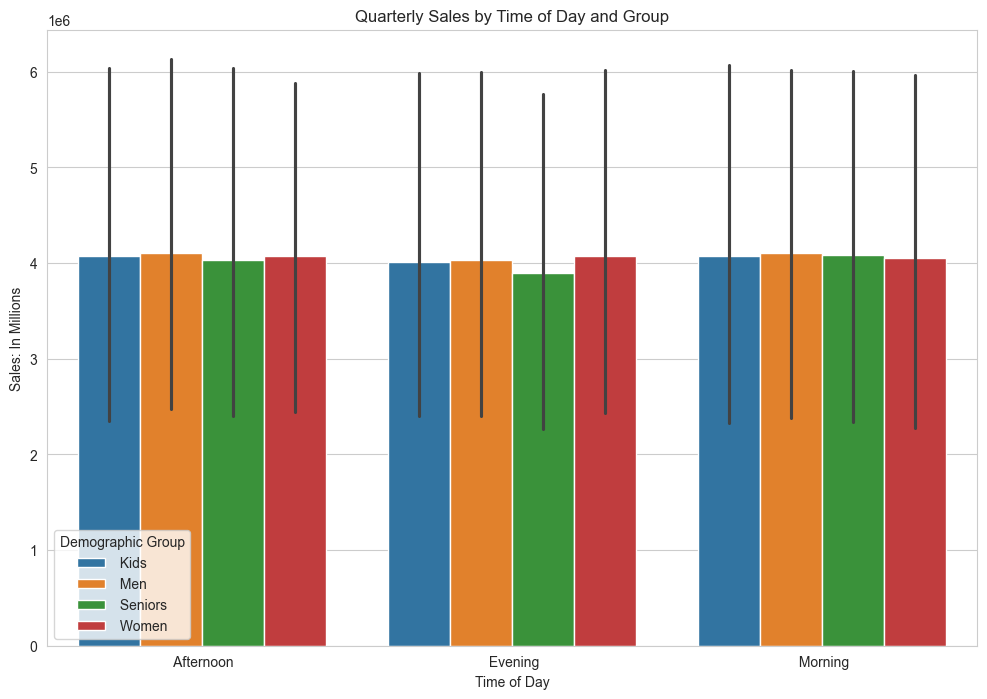

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Time', y='total_sales', hue='Group', data=q4_sales[q4_sales['Quarter'] == 4])
plt.title('Quarterly Sales by Time of Day and Group')
plt.xlabel('Time of Day')
plt.ylabel('Sales: In Millions')
plt.legend(title='Demographic Group')
plt.show()

I recommended using Seaborn for these dashboards due to its high-level interface and attractive default styles which make the visualizations not only informative but also appealing.
Seaborn's integration with Pandas makes it an excellent choice for handling complex datasets and performing group-wise comparisons, which are essential for these dashboards.
This approach ensures that the dashboard is clear, accessible, and provides actionable insights for effective decision-making by the Head of Sales and Marketing.